Use TensorFlow to classify cat/dog data set.  Use only 5000 of the images and follow all the steps in Cat_Dog Training_Code (under resources) to do this homework. Use 20% of your data for testing and 80% for training, and explain the steps that you have taken to improve your result. If you can project your images to 3-D and visualize that, that would be great as well.

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']
['dog.1.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg', 'dog.1007.jpg']


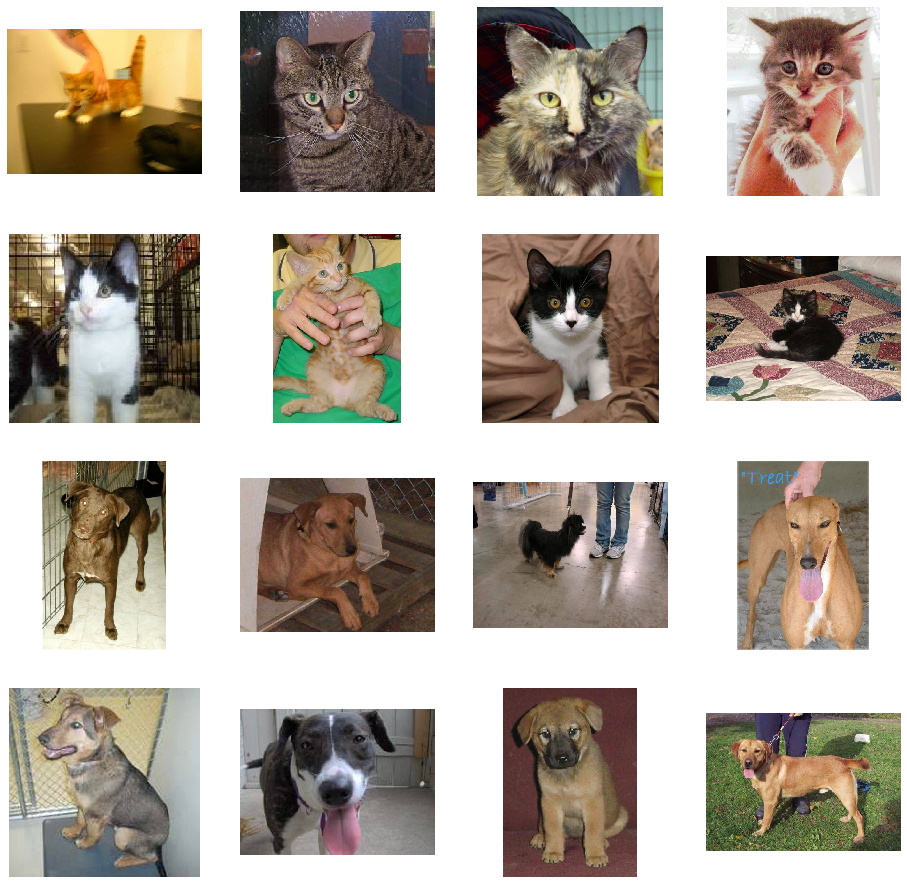

In [11]:
#Importing Modules
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_cats_dir='D:\\cats_and_dogs\\train\\cats'
train_dogs_dir='D:\\cats_and_dogs\\train\\dogs'

train_cat_fnames = os.listdir('D:\\cats_and_dogs\\train\\cats')
train_cat_fnames.sort()

#To display the first 10 frams name of cat and dog list 
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir('D:\\cats_and_dogs\\train\\dogs')
train_dog_fnames.sort()
print(train_dog_fnames[:10])

#Ploting few images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows = 4
ncols = 4
pic_index=0

#To set image size
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix=[os.path.join(train_cats_dir, fname)
    for fname in train_cat_fnames[pic_index-8:pic_index]
    ]
next_dog_pix=[os.path.join(train_dogs_dir, fname)
    for fname in train_dog_fnames[pic_index-8:pic_index]
    ]
  
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
# Set up subplot; subplot indices start at 1
  sp= plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') #Don't show axes (or gridlines)

  img= mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [2]:
train_dir='D:\\cats_and_dogs\\train'
validation_dir='D:\\cats_and_dogs\\validation'

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
 # Note the input shape is the desired size of the image 150x150 with 3 bytes color
 tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results to feed into a DNN
 tf.keras.layers.Flatten(),
 # 512 neuron hidden layer
 tf.keras.layers.Dense(512, activation='relu'),
 # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
 tf.keras.layers.Dense(1, activation='sigmoid')
])

#model.summary()


from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='binary_crossentropy',
 metrics = ['acc'])


#train_dir='D:\\cats_and_dogs\\train'
#validation_dir='D:\\cats_and_dogs\\validation'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
 batch_size=20,
 class_mode='binary',
target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
 batch_size=20,
 class_mode = 'binary',
 target_size = (150, 150))


history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 66s 663ms/step - loss: 0.7924 - acc: 0.5660 - val_loss: 0.6321 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 66s 656ms/step - loss: 0.6276 - acc: 0.6525 - val_loss: 0.6131 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 66s 662ms/step - loss: 0.5613 - acc: 0.7120 - val_loss: 0.5897 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 76s 758ms/step - loss: 0.5156 - acc: 0.7390 - val_loss: 0.6145 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 79s 788ms/step - loss: 0.4788 - acc: 0.7710 - val_loss: 0.6302 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 80s 796ms/step - loss: 0.4211 - acc: 0.8150 - val_loss: 0.5610 - val_acc: 0.7540
Epoch 7/30
100/100 [==============================] - 83s 834ms/step - loss: 0.3704 - acc: 0.8300 - val_lo

'\nhistory = model.fit(\n        train_generator,\n        steps_per_epoch=20,\n        epochs=15,\n        validation_data=validation_generator,\n        validation_steps=100,\n        verbose=2)\n'

In [10]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
#uploaded=files.upload()
#for fn in uploaded.keys():
 # predicting images
 #path='/content/' + fn
path='D:\\d1_test.jpg'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
#print(x)
classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print("is a dog")

else:
    print(" is a cat")

[1.]
is a dog


Text(0.5, 1.0, 'Training and validation loss')

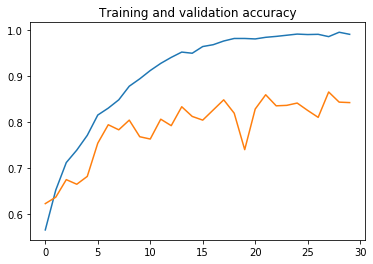

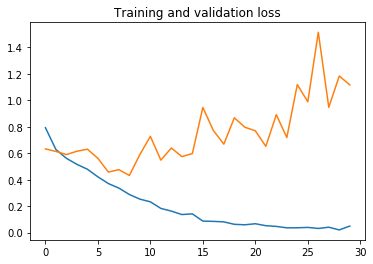

In [5]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

C:\Users\yvrka\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\yvrka\Anaconda2\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


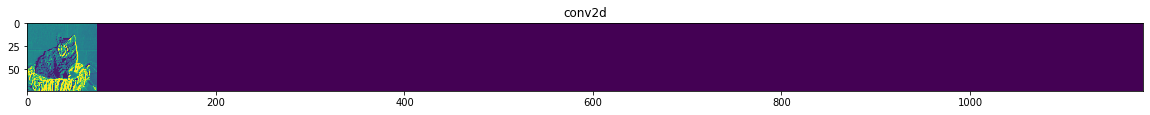

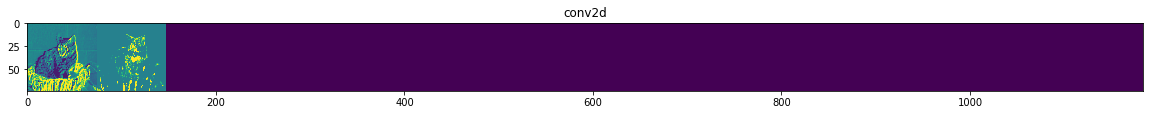

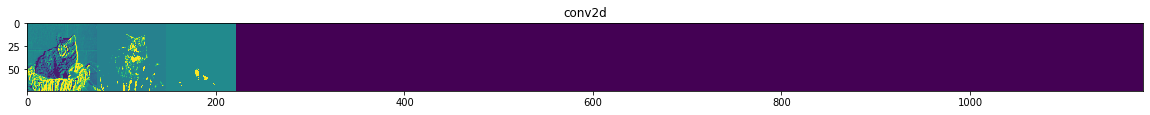

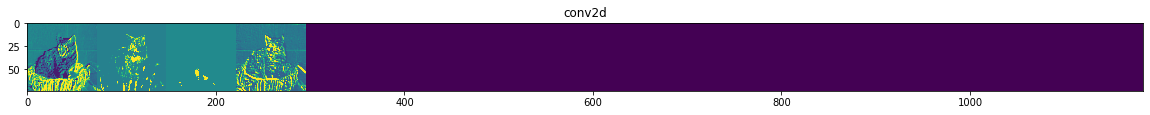

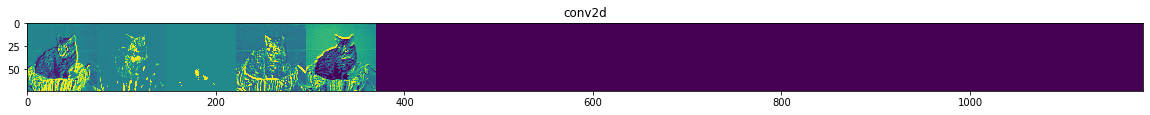

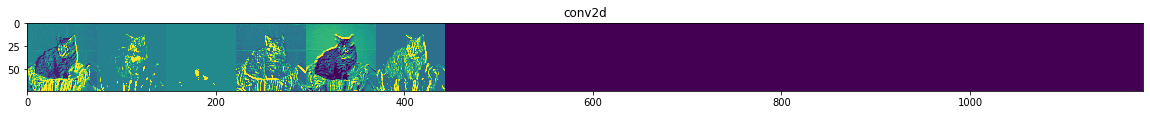

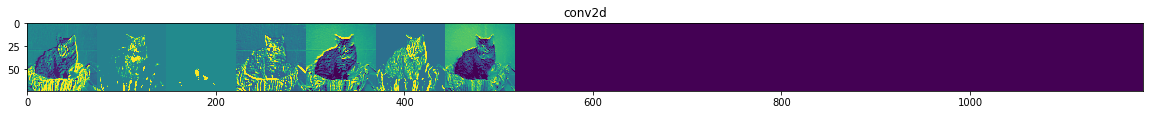

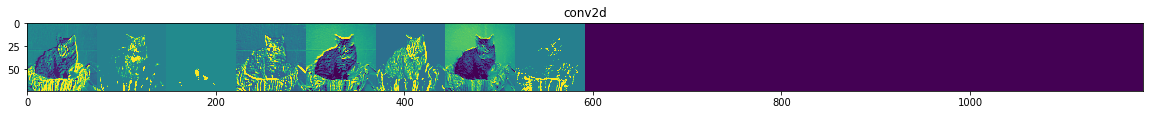

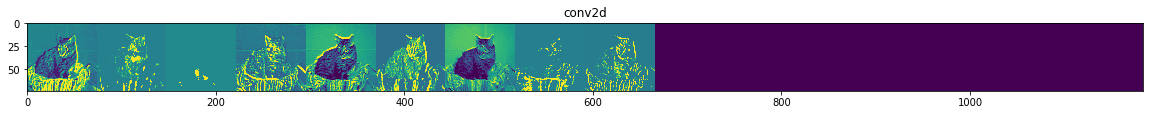

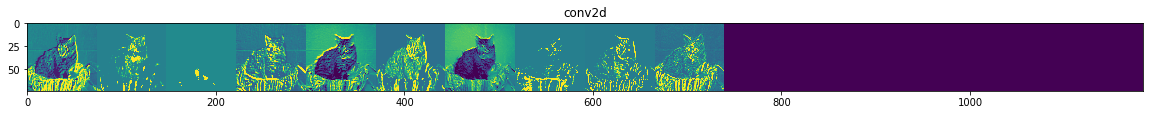

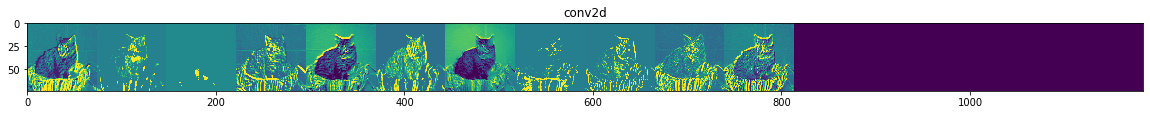

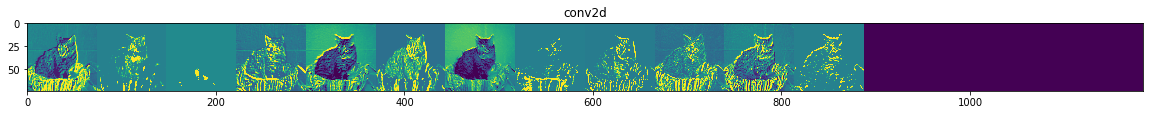

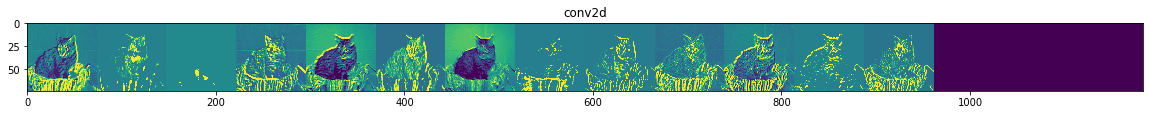

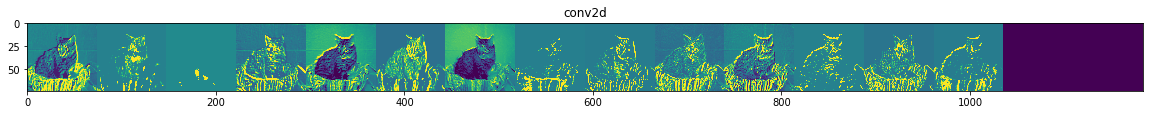

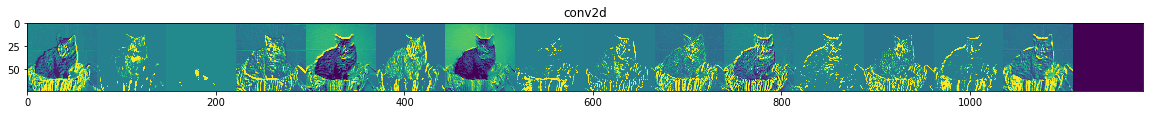

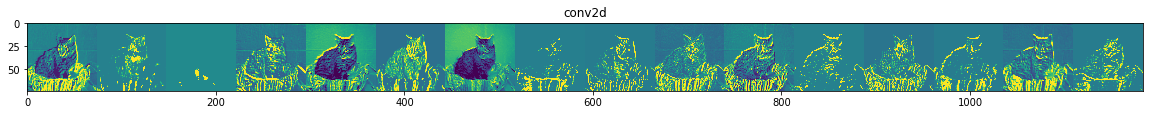

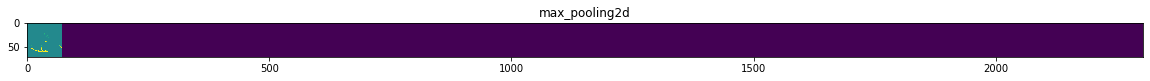

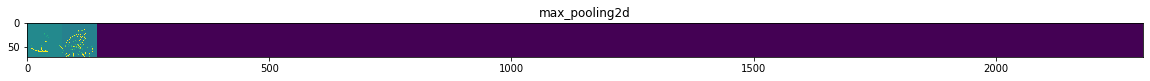

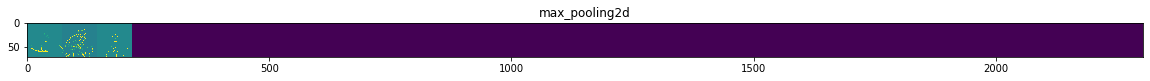

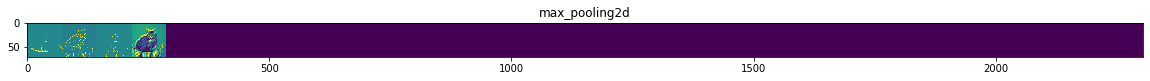

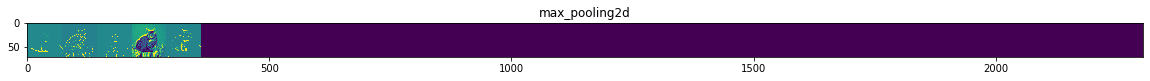

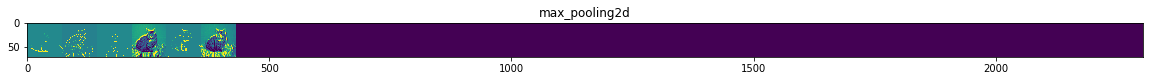

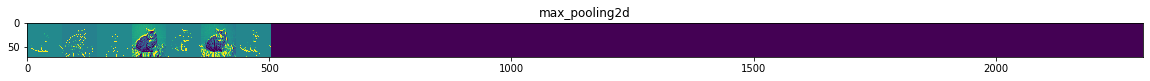

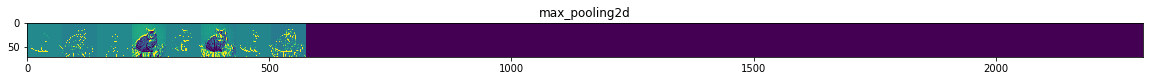

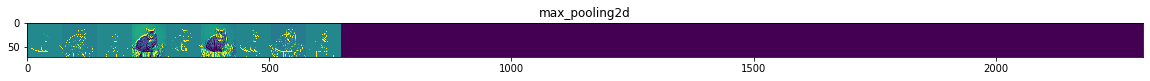

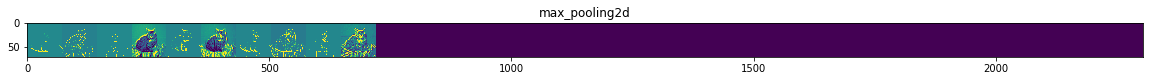

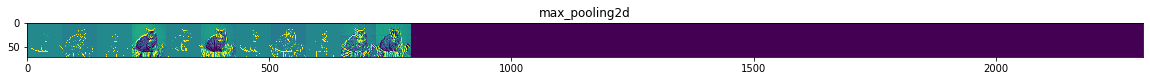

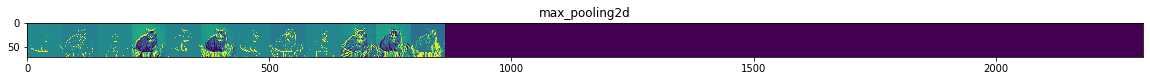

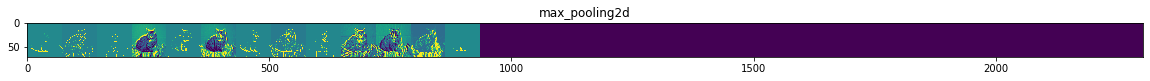

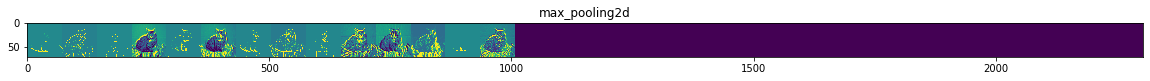

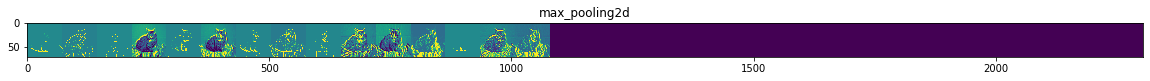

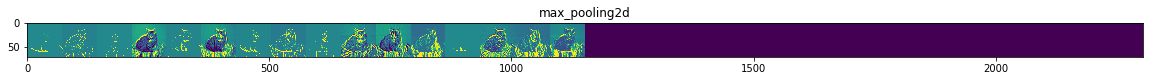

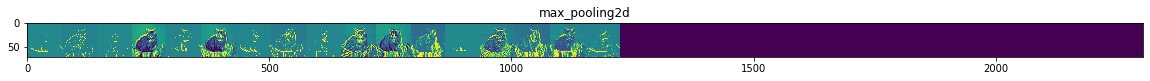

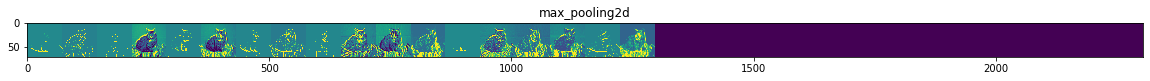

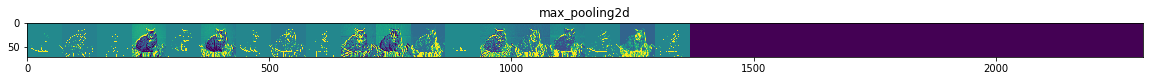

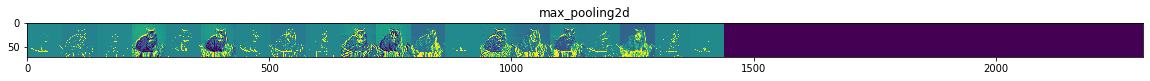

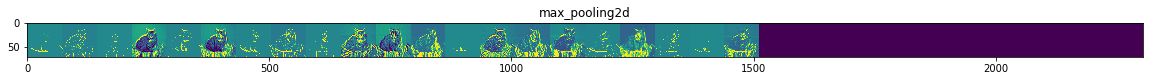

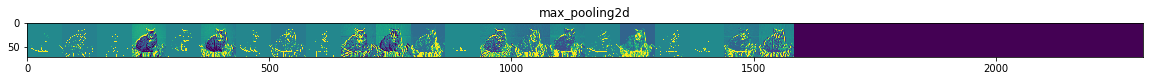

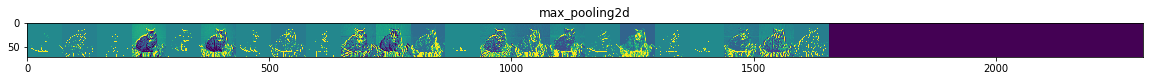

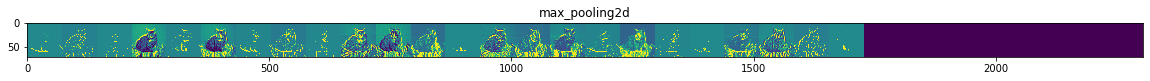

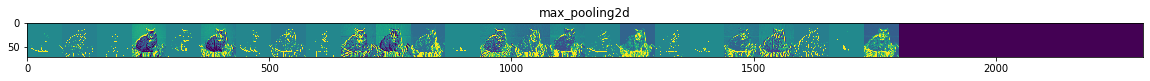

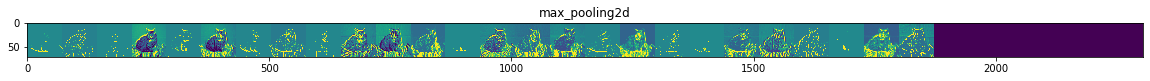

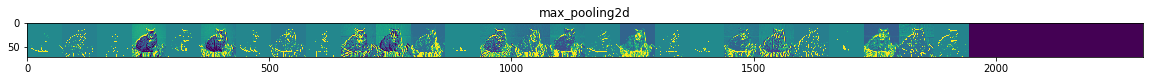

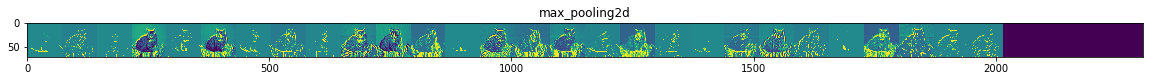

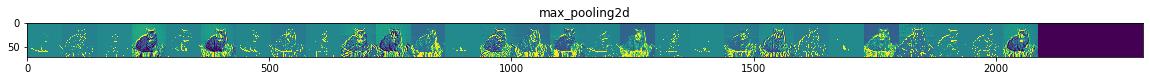

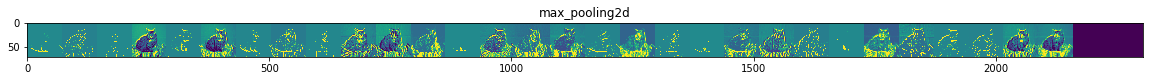

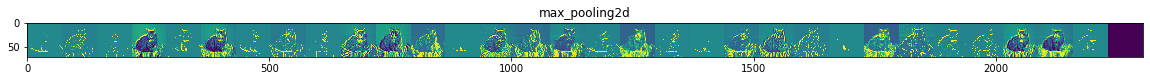

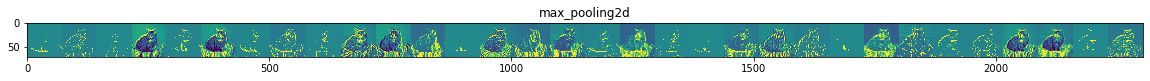

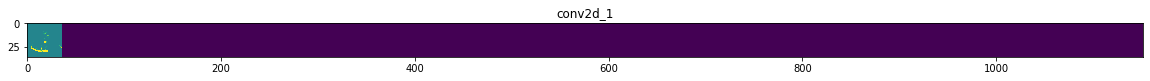

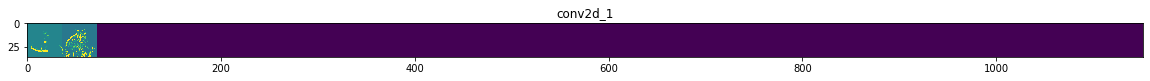

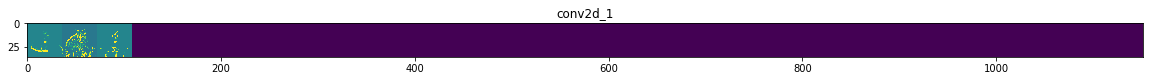

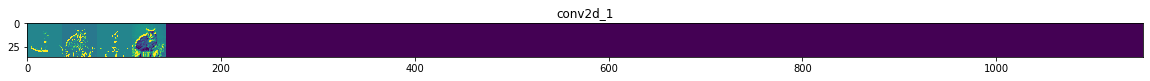

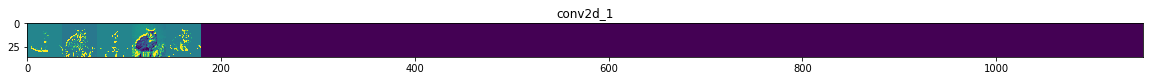

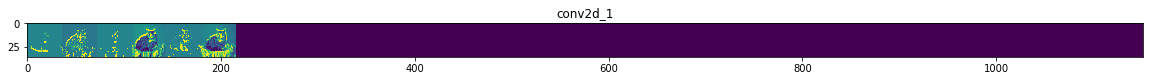

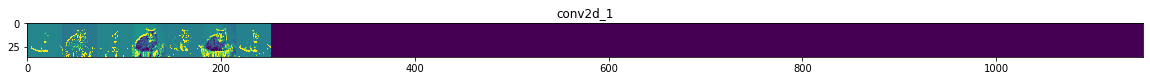

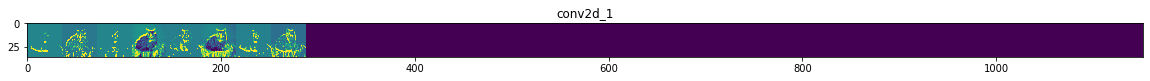

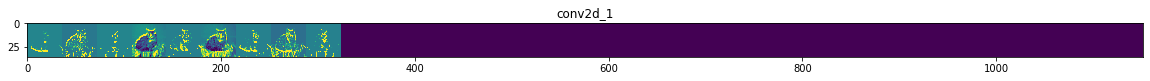

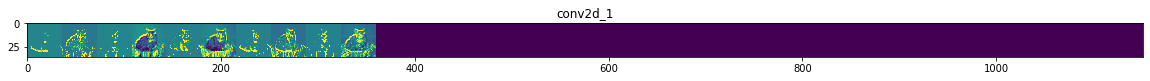

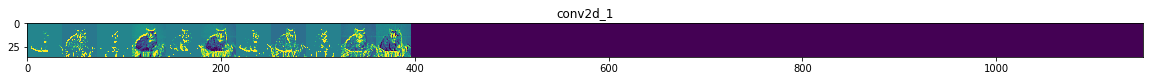

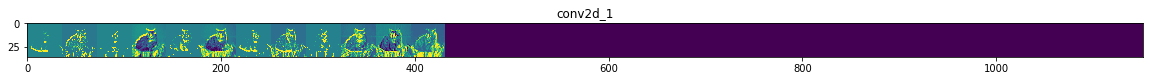

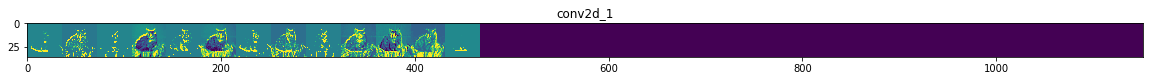

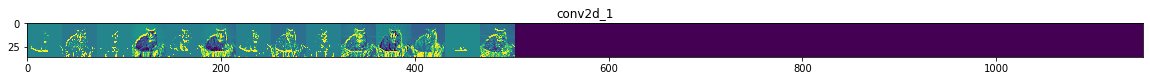

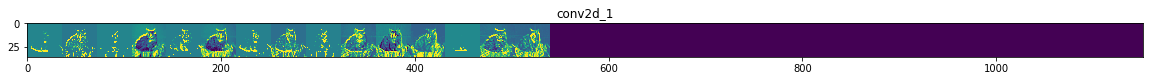

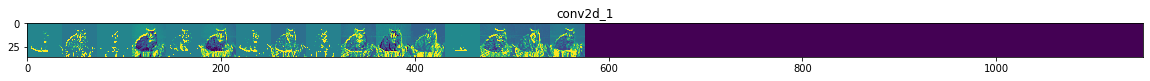

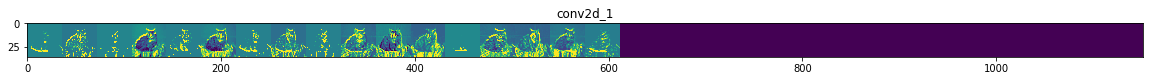

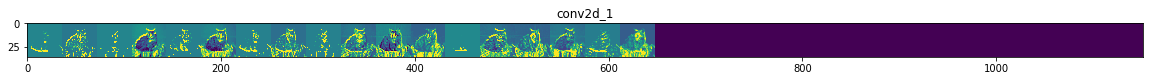

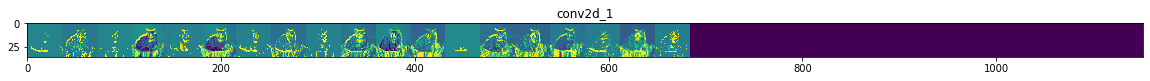

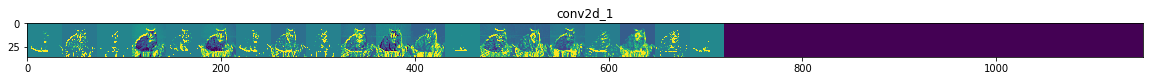

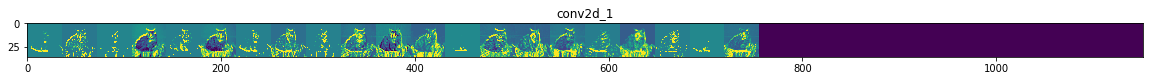

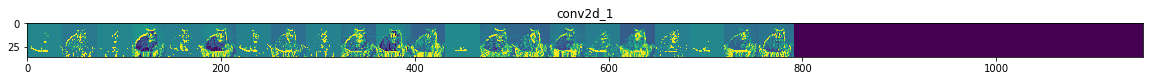

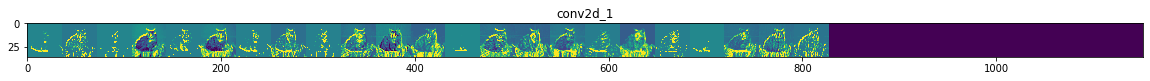

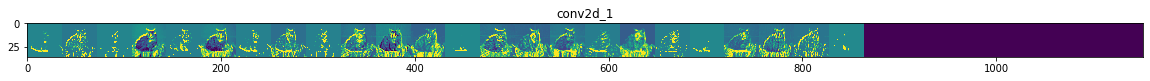

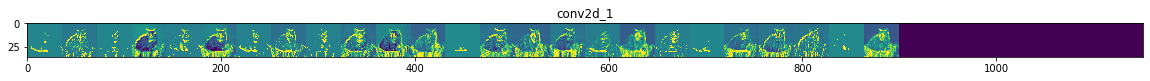

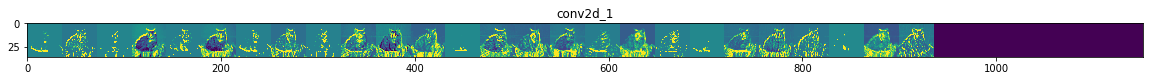

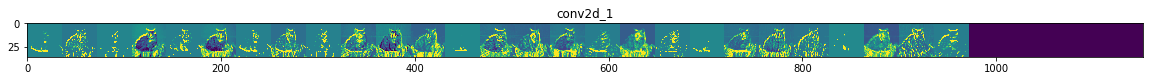

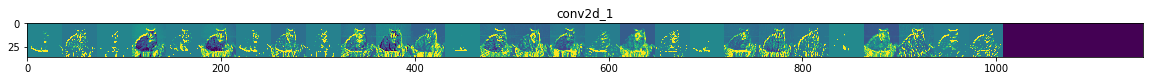

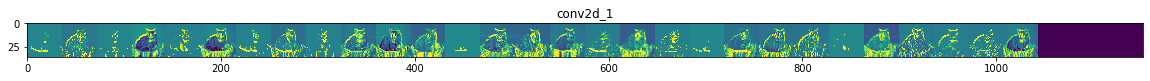

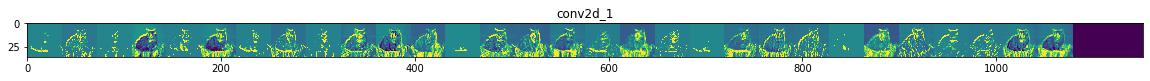

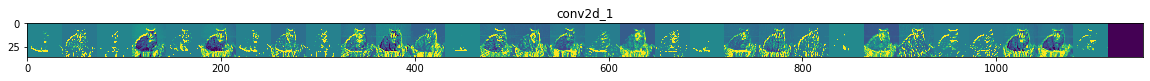

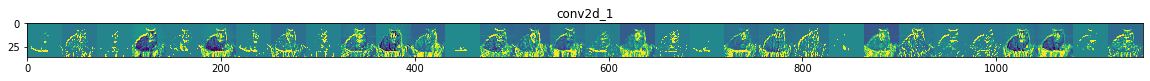

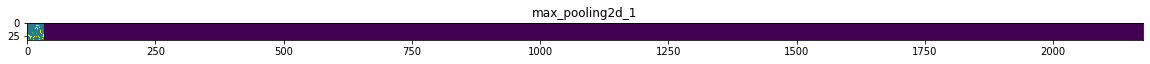

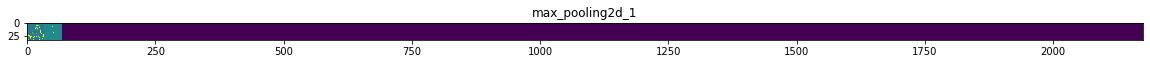

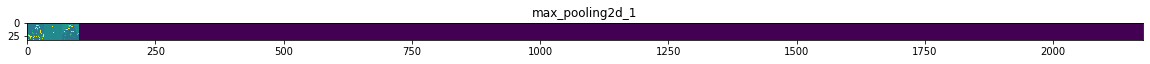

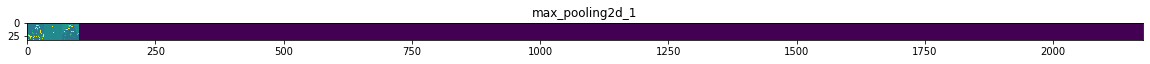

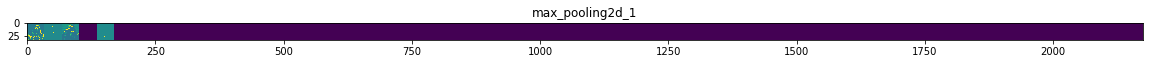

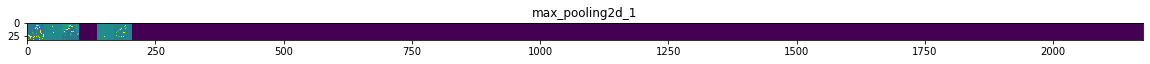

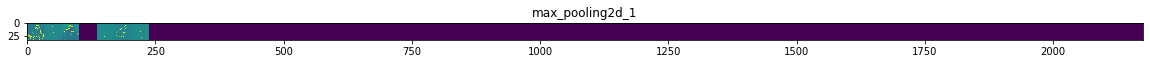

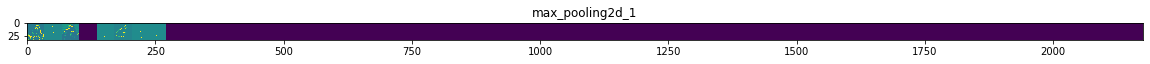

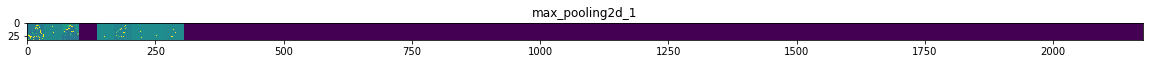

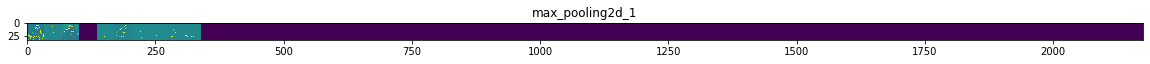

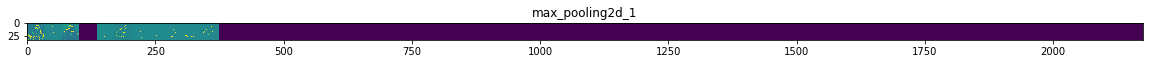

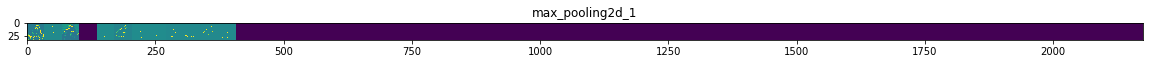

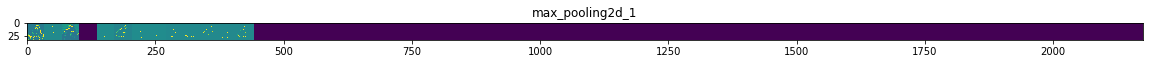

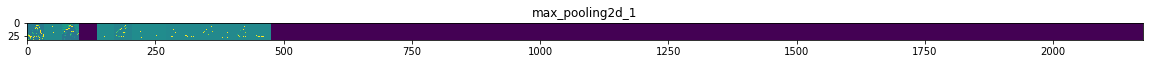

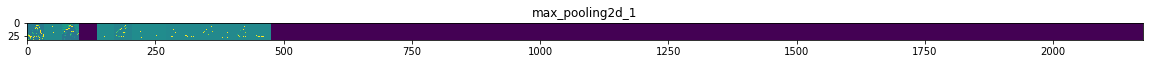

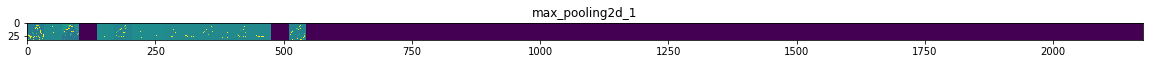

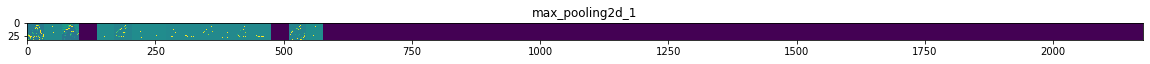

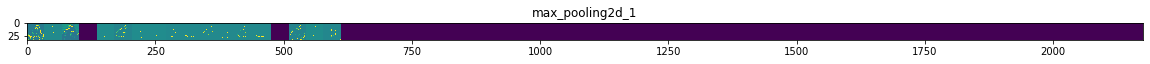

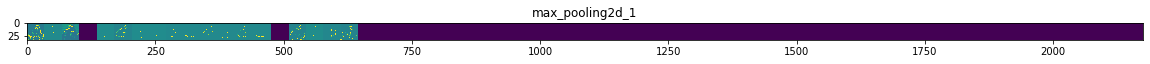

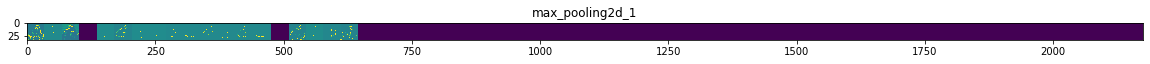

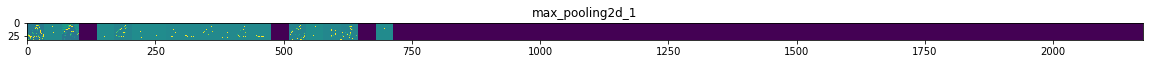

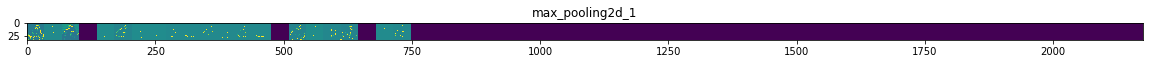

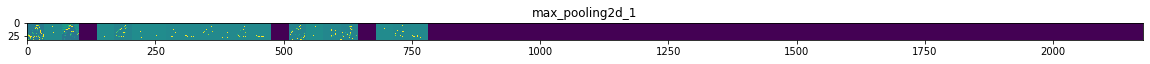

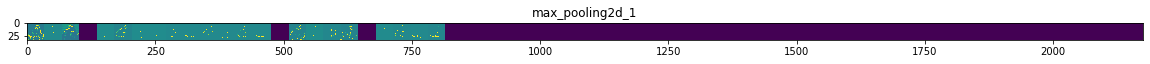

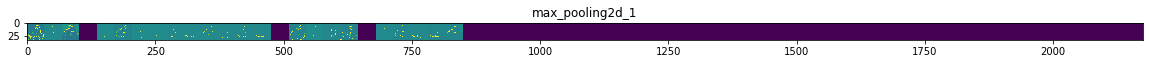

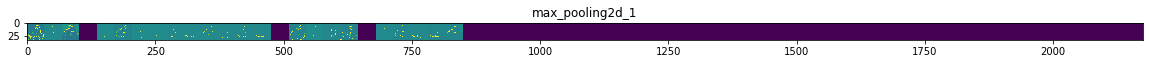

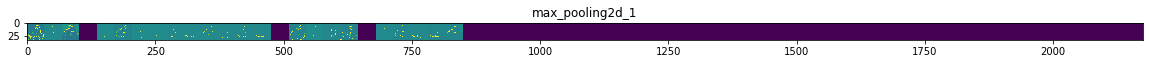

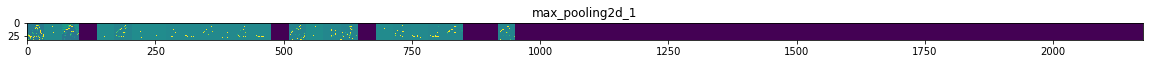

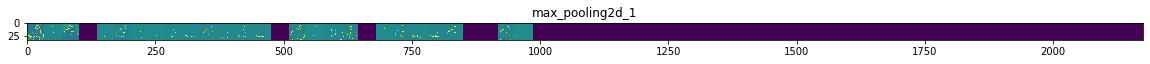

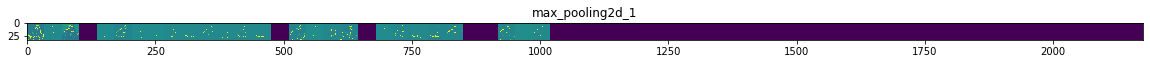

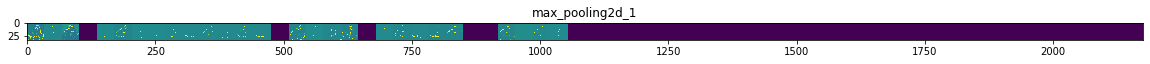

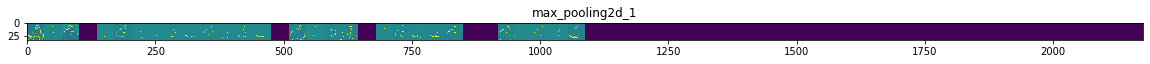

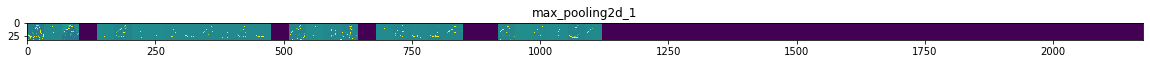

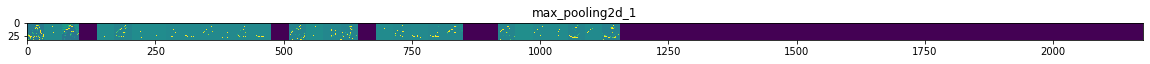

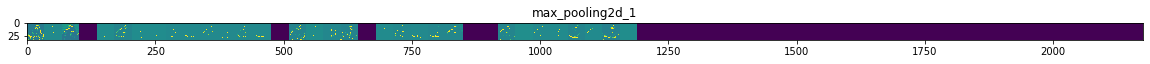

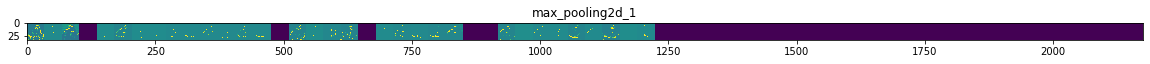

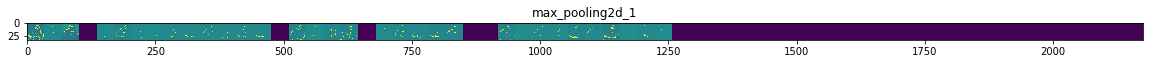

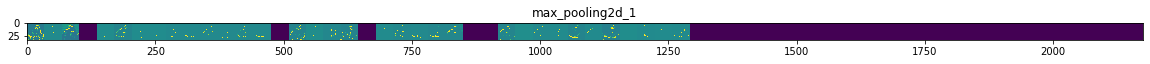

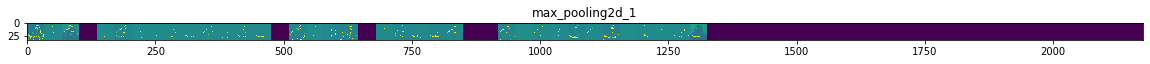

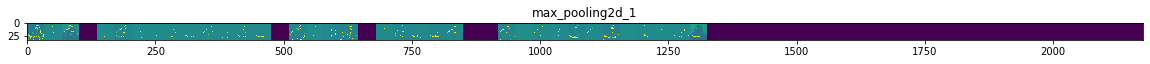

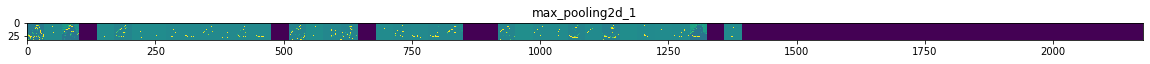

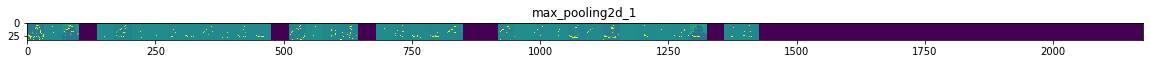

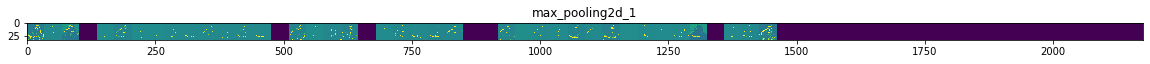

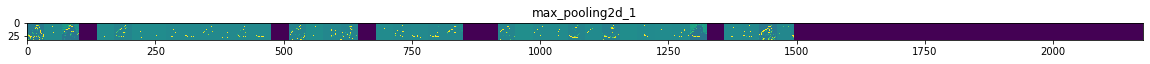

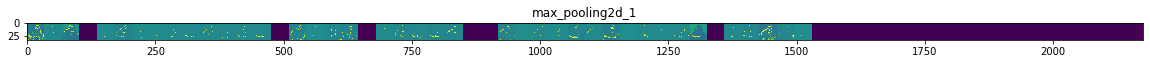

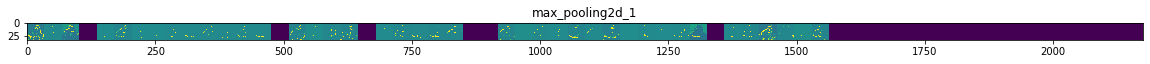

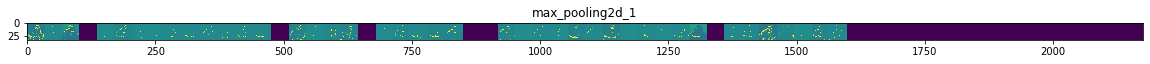

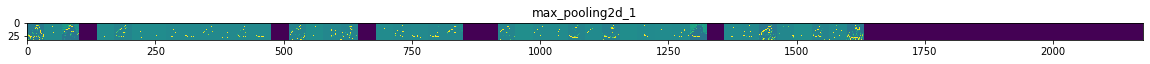

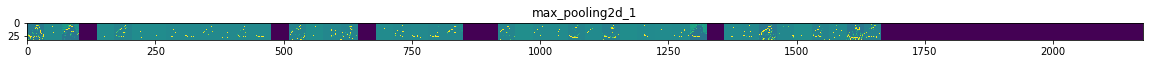

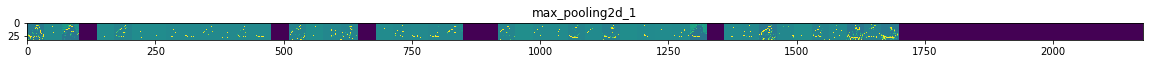

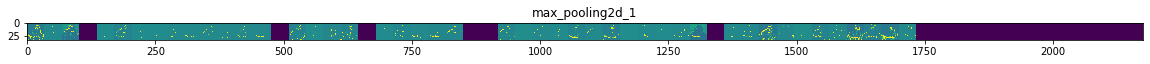

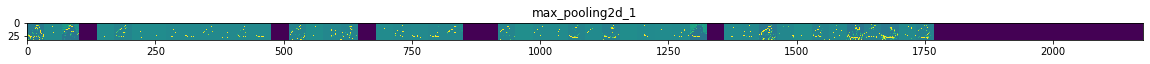

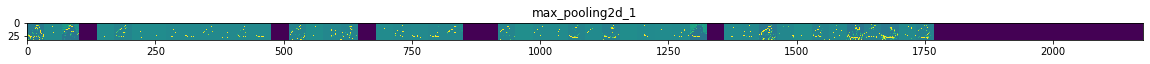

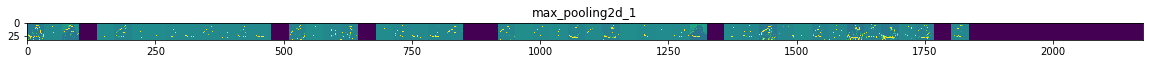

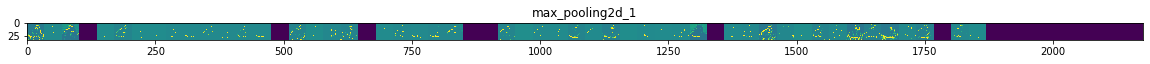

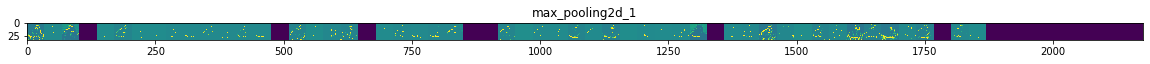

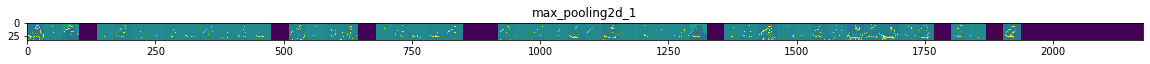

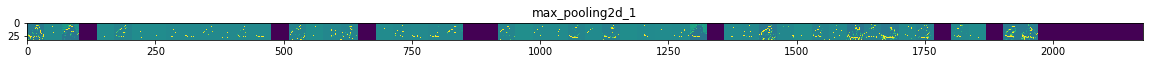

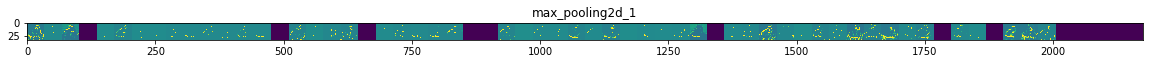

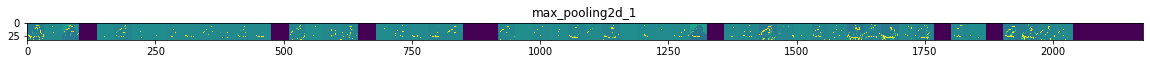

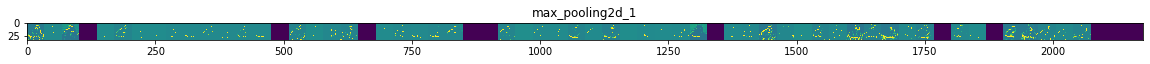

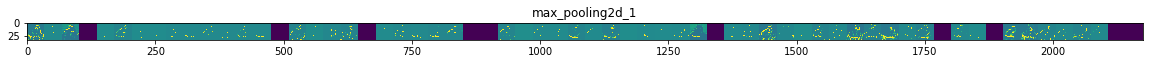

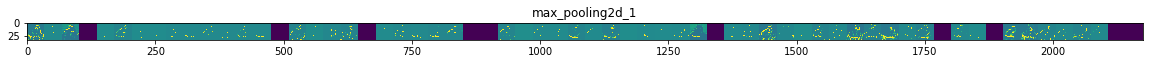

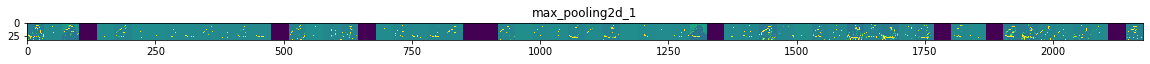

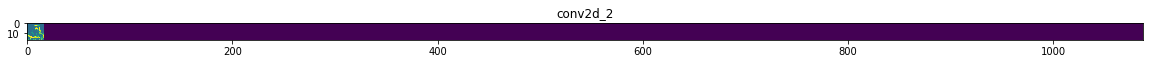

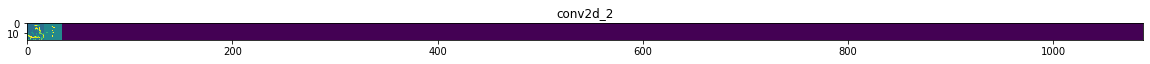

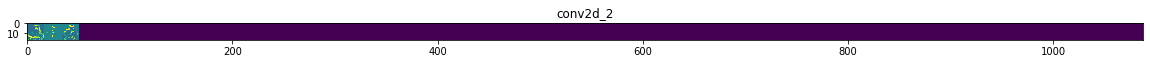

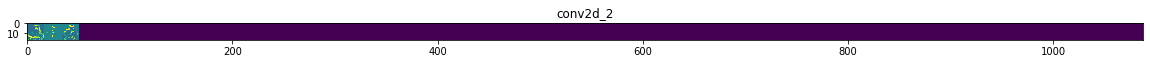

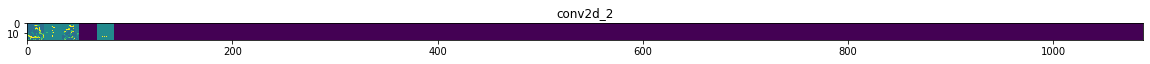

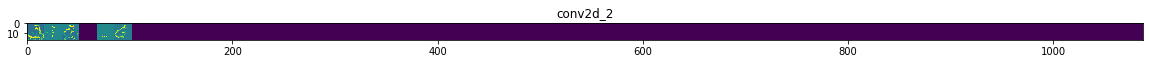

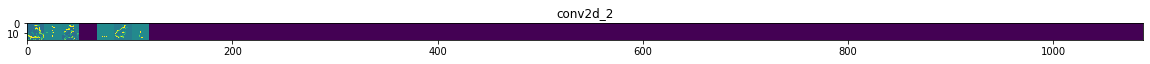

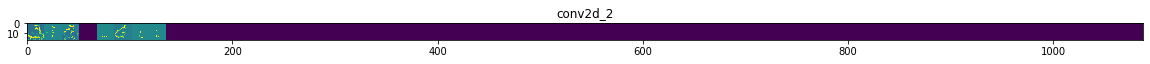

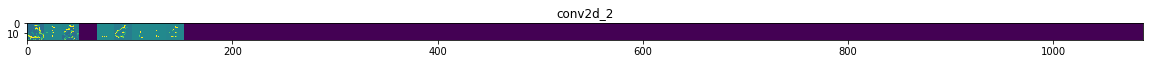

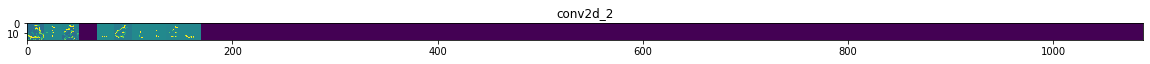

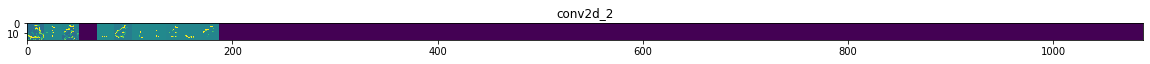

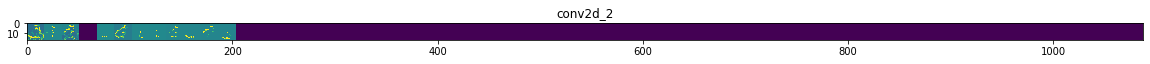

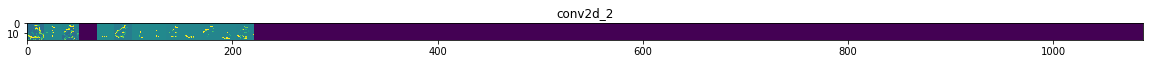

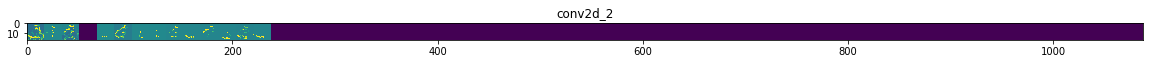

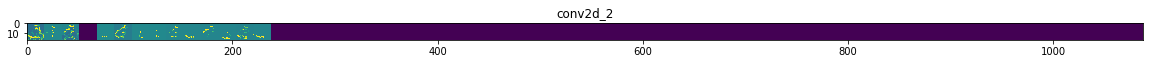

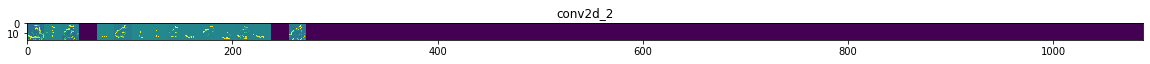

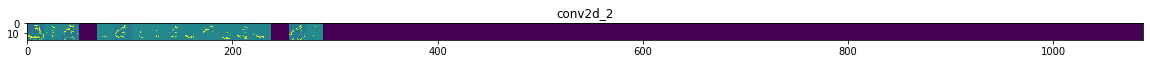

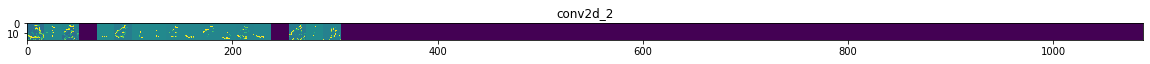

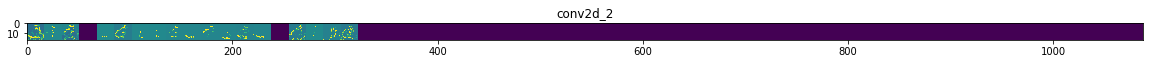

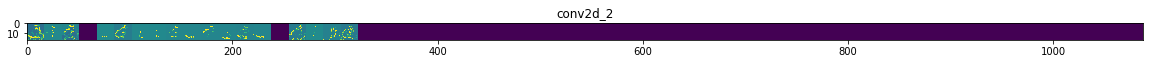

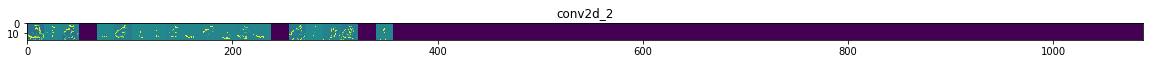

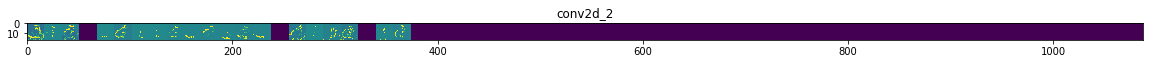

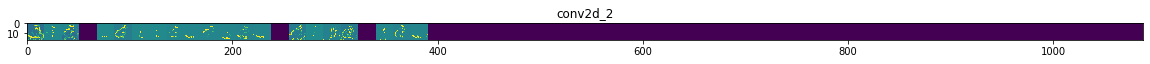

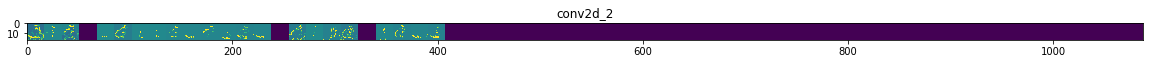

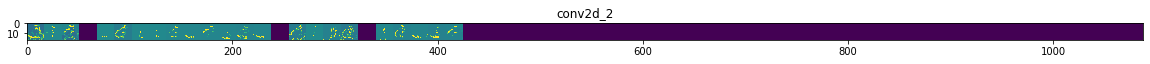

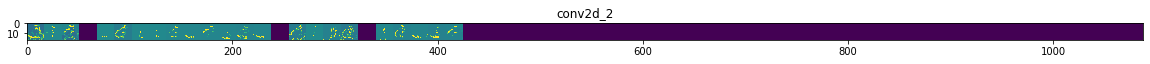

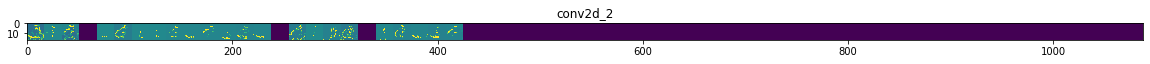

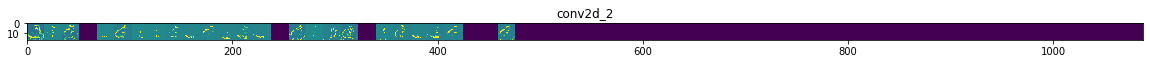

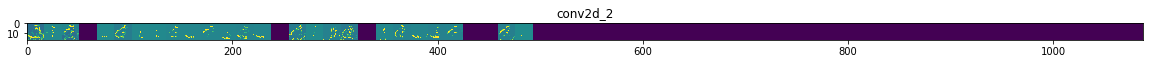

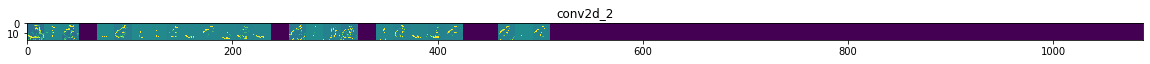

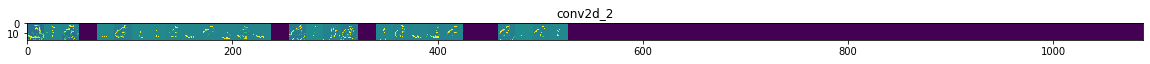

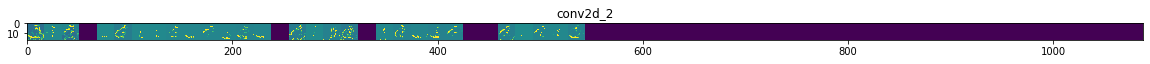

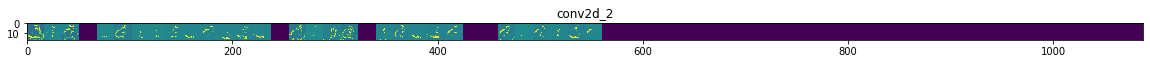

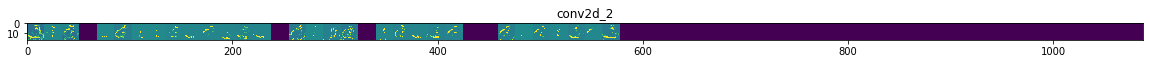

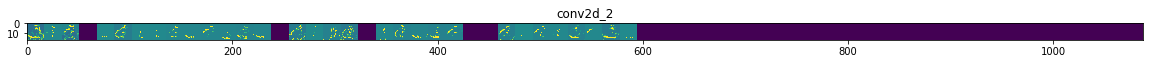

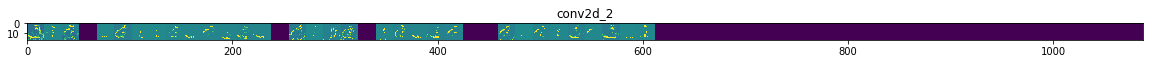

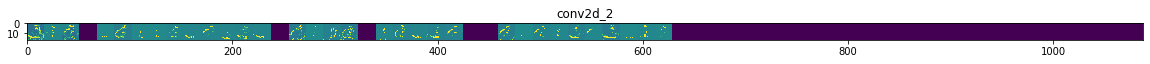

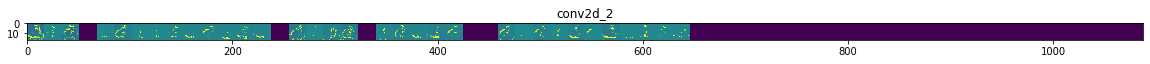

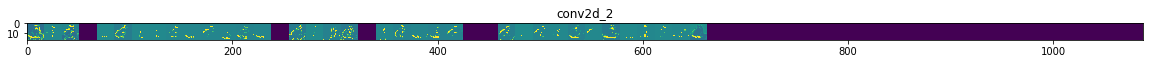

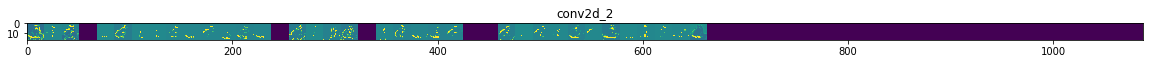

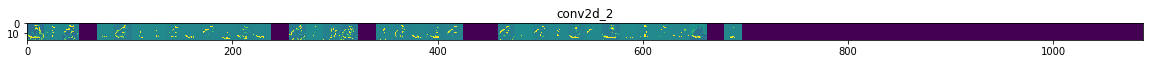

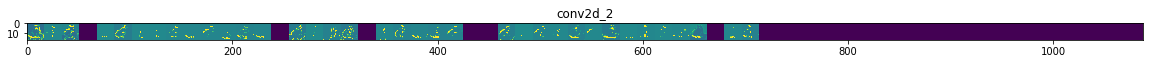

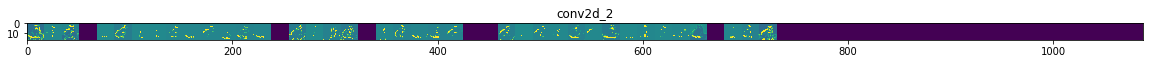

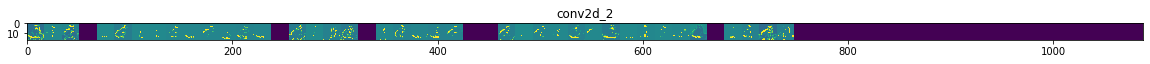

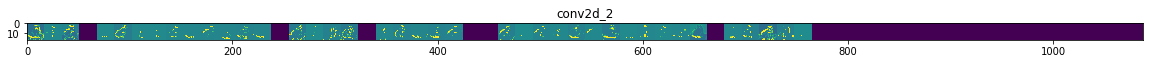

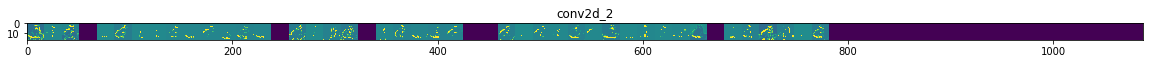

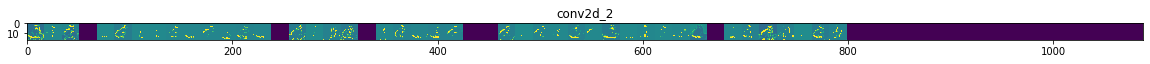

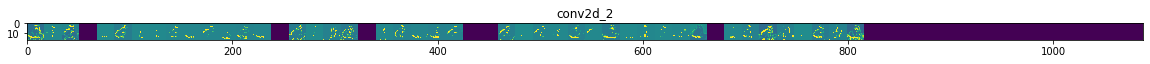

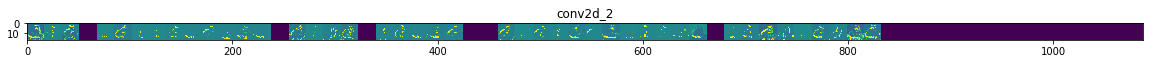

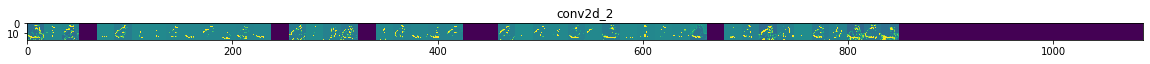

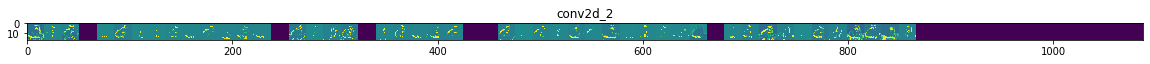

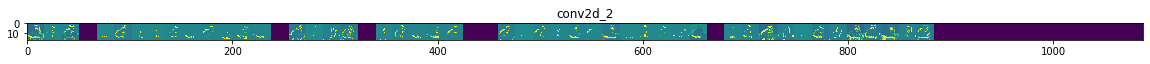

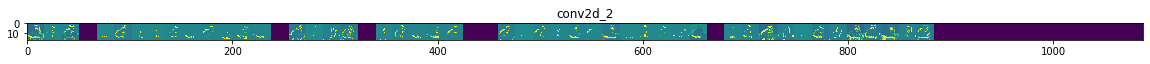

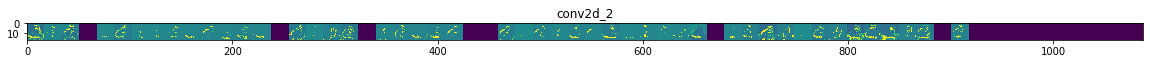

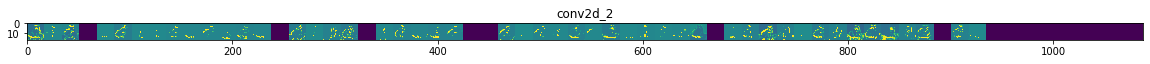

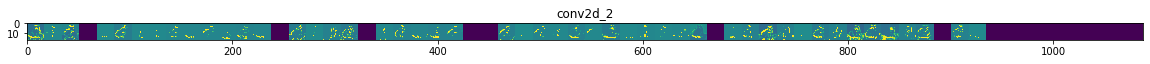

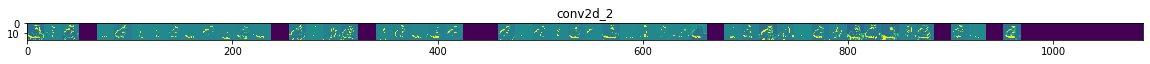

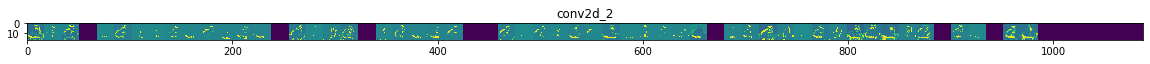

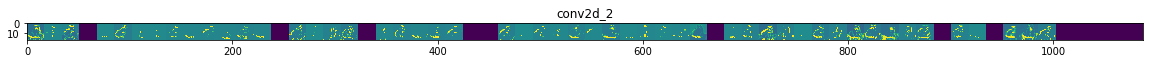

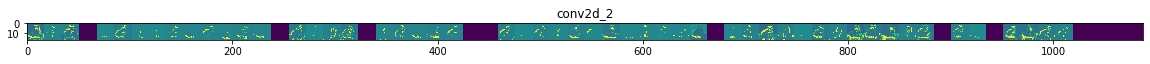

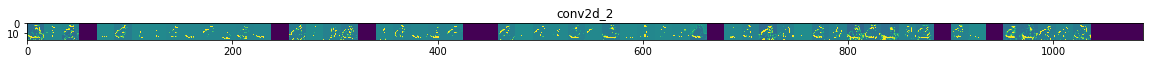

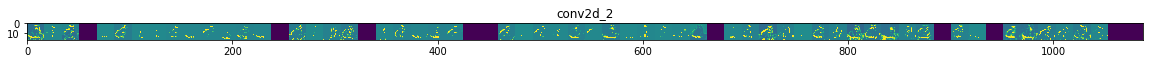

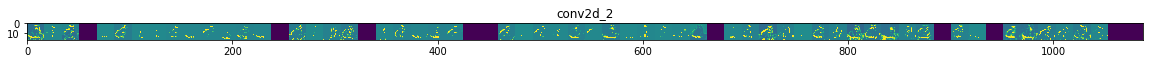

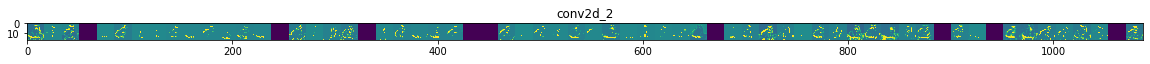

In [6]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)
# Rescale by 1/255
x /= 255.0
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0,:,:, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            #-----------------
            # Display the grid
            #-----------------
            scale = 20. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.title ( layer_name )
            plt.grid ( False )
            plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [7]:
print(val_acc)

[0.6230000257492065, 0.6370000243186951, 0.675000011920929, 0.6650000214576721, 0.6819999814033508, 0.7540000081062317, 0.7940000295639038, 0.7829999923706055, 0.8040000200271606, 0.7680000066757202, 0.7630000114440918, 0.8059999942779541, 0.7919999957084656, 0.8330000042915344, 0.8119999766349792, 0.8040000200271606, 0.8259999752044678, 0.8479999899864197, 0.8190000057220459, 0.7400000095367432, 0.828000009059906, 0.859000027179718, 0.8349999785423279, 0.8360000252723694, 0.8410000205039978, 0.824999988079071, 0.8100000023841858, 0.8650000095367432, 0.8429999947547913, 0.8420000076293945]


acc [0.5659999847412109, 0.6524999737739563, 0.7120000123977661, 0.7390000224113464, 0.7710000276565552, 0.8149999976158142, 0.8299999833106995, 0.8479999899864197, 0.8774999976158142, 0.8934999704360962, 0.9114999771118164, 0.9269999861717224, 0.9399999976158142, 0.9514999985694885, 0.9490000009536743, 0.9635000228881836, 0.9674999713897705, 0.9754999876022339, 0.9810000061988831, 0.9810000061988831, 0.9800000190734863, 0.9835000038146973, 0.9854999780654907, 0.9879999756813049, 0.9904999732971191, 0.9894999861717224, 0.9900000095367432, 0.9850000143051147, 0.9944999814033508, 0.9900000095367432]
val_acc [0.6230000257492065, 0.6370000243186951, 0.675000011920929, 0.6650000214576721, 0.6819999814033508, 0.7540000081062317, 0.7940000295639038, 0.7829999923706055, 0.8040000200271606, 0.7680000066757202, 0.7630000114440918, 0.8059999942779541, 0.7919999957084656, 0.8330000042915344, 0.8119999766349792, 0.8040000200271606, 0.8259999752044678, 0.8479999899864197, 0.8190000057220459, 0.74000

<Figure size 432x288 with 0 Axes>

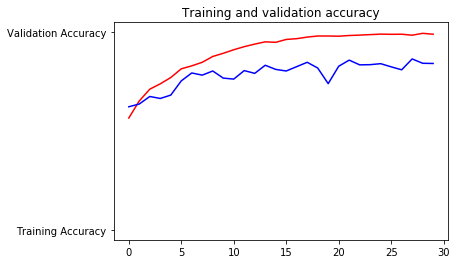

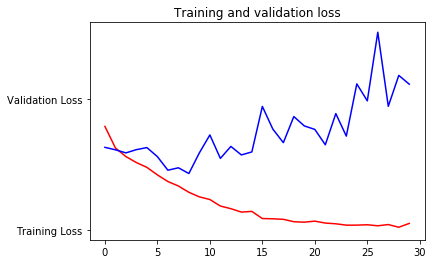

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

print("acc",acc)
print("val_acc",val_acc)


epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.figure()

In [22]:
model.save('model_84')

INFO:tensorflow:Assets written to: model_84\assets


In [21]:
loaded_model=tf.keras.models.load_model('C:\\Users\\yvrka\\model84')